In [3]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:
%pip install mlflow dagshub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import dagshub
dagshub.init(repo_owner='speedyskill', repo_name='swiggy-delivery-time-prediction', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=8529504f-3dff-4a0d-8214-d1af2cb4cf4d&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=9c5305de9dedd4342cbb862c2ad0ee9ae7c26198bcba6f7febe3f3385ce09f73




Accessing as speedyskill

Initialized MLflow to track repo "speedyskill/swiggy-delivery-time-prediction"

Repository speedyskill/swiggy-delivery-time-prediction initialized!

In [7]:
df=pd.read_csv('/content/cleaned_data.csv')
df.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,order_time_hour,order_time_of_day,pickup_time,distance,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,19,3,saturday,1,11.0,morning,15.0,3.025149,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,25,3,friday,0,19.0,evening,5.0,20.183530,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,19,3,saturday,1,8.0,morning,15.0,1.552758,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,5,4,tuesday,0,18.0,evening,10.0,7.790401,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,26,3,saturday,1,13.0,afternoon,15.0,6.210138,medium


In [8]:
# droping columns not required in model training

columns_to_drop=['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "city_name",
                    "order_day_of_week",
                    "order_month"]

df.drop(columns=columns_to_drop,inplace=True)

df.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,order_time_of_day,pickup_time,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,1,morning,15.0,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,0,evening,5.0,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,1,morning,15.0,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,0,evening,10.0,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,1,afternoon,15.0,6.210138,medium


# Dropping missing Values

In [9]:
import mlflow

In [10]:
# set the tarcking server

mlflow.set_tracking_uri('https://dagshub.com/speedyskill/swiggy-delivery-time-prediction.mlflow')

In [11]:
# mlflow experiment

mlflow.set_experiment('Exp 1 - Keep Vs Drop Missing Values')

2025/04/28 08:29:54 INFO mlflow.tracking.fluent: Experiment with name 'Exp 1 - Keep Vs Drop Missing Values' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/a3316ff6ab67456d91497eb7c17259d6', creation_time=1745828994595, experiment_id='0', last_update_time=1745828994595, lifecycle_stage='active', name='Exp 1 - Keep Vs Drop Missing Values', tags={}>

In [14]:
temp_df=df.dropna().copy()
temp_df.isna().sum().sum()

np.int64(0)

In [16]:
X=temp_df.drop(columns='time_taken')
y=temp_df['time_taken']

In [17]:
# train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (30156, 15)
The shape of test data is (7539, 15)


In [33]:

# do basic preprocessing

num_cols = ["age","ratings","pickup_time","distance"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [34]:
# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [35]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order]), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

preprocessor.set_output(transform="pandas")

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time', 'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']]),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [36]:
# transform the data

X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_train_trans

,age,ratings,pickup_time,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,city_type_semi-urban,city_type_urban,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
8708,0.473684,0.56,1.0,0.404165,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0,2.0
25198,1.000000,0.76,0.0,0.154044,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1.0
34049,0.473684,0.80,0.5,0.002461,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1,0.0
25987,1.000000,0.92,1.0,0.460411,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0,1.0
37121,0.526316,0.76,0.5,0.243676,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20239,0.578947,0.92,0.5,0.451895,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,0,0.0
7590,0.052632,1.00,1.0,0.612270,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1,1.0
13610,0.526316,0.92,0.0,0.322877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0.0
1045,0.947368,0.96,0.5,0.004486,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0


In [37]:
# tranforming my target column

pt=PowerTransformer(method='yeo-johnson')
y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [39]:
y_train_pt

array([[ 2.02867161],
       [ 0.55453913],
       [-2.02426721],
       ...,
       [-1.35093653],
       [ 0.04711066],
       [ 0.2571302 ]])

In [40]:
from sklearn.ensemble import RandomForestRegressor

r_f = RandomForestRegressor()

r_f.fit(X_train_trans,y_train_pt)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [41]:
# get the prediction

y_pred_train=r_f.predict(X_train_trans)
y_pred_test=r_f.predict(X_test_trans)

In [42]:
# get the actual prediction

y_pred_train_actual=pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_actual=pt.inverse_transform(y_pred_test.reshape(-1,1))

In [44]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_actual):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_actual):.2f} minutes")

The train error is 1.15 minutes
The test error is 3.10 minutes


In [46]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_actual):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_actual):.2f}")

The train r2 score is 0.98
The test r2 score is 0.83


In [48]:
# calculate the cross val score

from sklearn.model_selection import cross_val_score

cv_score=cross_val_score(r_f,X_train_trans,y_train_pt.ravel(),cv=5,scoring='r2')

cv_score

array([0.80787676, 0.80968407, 0.809333  , 0.80823118, 0.81240347])

In [49]:
# mean score

cv_score.mean()

np.float64(0.8095056934424436)

In [50]:
r_f.feature_importances_

array([0.11940183, 0.21169562, 0.01134634, 0.13268264, 0.03298592,
       0.02365874, 0.01953912, 0.07993085, 0.01762456, 0.00537454,
       0.00553579, 0.00539842, 0.00306862, 0.00343743, 0.00645665,
       0.00080372, 0.00740354, 0.00577758, 0.00327172, 0.0011341 ,
       0.00222319, 0.15188186, 0.01906146, 0.08153339, 0.04877237])

<Axes: >

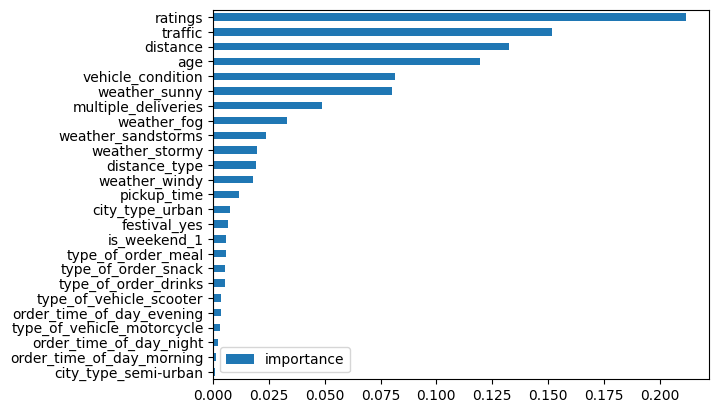

In [60]:
pd.DataFrame(r_f.feature_importances_,
             index=X_train_trans.columns,
             columns=['importance']).sort_values(by='importance').plot(kind='barh')

In [61]:
# log experiment

with mlflow.start_run(run_name='Drop missing Values'):
  # mlflow log experiment type
  mlflow.log_param("experiment_type","Drop missing values")
  # log model params
  mlflow.log_params(r_f.get_params())

  # log metrics
  mlflow.log_metric('train_error',mean_absolute_error(y_train,y_pred_train_actual))
  mlflow.log_metric('test_error',mean_absolute_error(y_test,y_pred_test_actual))
  mlflow.log_metric('train_r2_score',r2_score(y_train,y_pred_train_actual))
  mlflow.log_metric('test_r2_score',r2_score(y_test,y_pred_test_actual))
  mlflow.log_metric('cv_score',cv_score.mean())


🏃 View run Drop missing Values at: https://dagshub.com/speedyskill/swiggy-delivery-time-prediction.mlflow/#/experiments/0/runs/e95adf2d62b543b0bc574173686222f0
🧪 View experiment at: https://dagshub.com/speedyskill/swiggy-delivery-time-prediction.mlflow/#/experiments/0


# Impute Missing Values

In [62]:
missing_df=df.copy()

In [63]:
missing_df.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,order_time_of_day,pickup_time,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,1,morning,15.0,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,0,evening,5.0,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,1,morning,15.0,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,0,evening,10.0,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,1,afternoon,15.0,6.210138,medium


In [65]:
missing_df.isna().sum().rename('missing_count')

,missing_count
age,1854
ratings,1908
weather,525
traffic,510
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1198


In [66]:
X=missing_df.drop(columns='time_taken')
y=missing_df['time_taken']

In [67]:
# train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
# transform target column

pt=PowerTransformer(method='yeo-johnson')
y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [69]:
missing_col=[col for col in missing_df.columns if missing_df[col].isna().sum() > 0]

In [70]:
missing_col

['age',
 'ratings',
 'weather',
 'traffic',
 'multiple_deliveries',
 'festival',
 'city_type',
 'order_time_of_day',
 'pickup_time',
 'distance',
 'distance_type']

# Imputation PipeLine

In [71]:
# features to fill with mode

features_to_fill_mode=['festival','multiple_deliveries','city_type']
features_to_fill_missing=[col for col in nominal_cat_cols if col not in features_to_fill_mode]

In [72]:
features_to_fill_missing

['weather',
 'type_of_order',
 'type_of_vehicle',
 'is_weekend',
 'order_time_of_day']

In [76]:
# simple imputer to fill categorical columnn with mode

simple_imputer=ColumnTransformer(transformers=[
    ('mode_imputer',SimpleImputer(strategy='most_frequent'),features_to_fill_mode),
    ('missing_imputer',SimpleImputer(strategy='constant',fill_value='missing'),features_to_fill_missing)
],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

simple_imputer.set_output(transform='pandas')

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('mode_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['festival', 'multiple_deliveries',
                                  'city_type']),
                                ('missing_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'is_weekend', 'order_time_of_day'])],
                  verbose_feature_names_out=False)

In [79]:
preprocessor=ColumnTransformer(transformers=[
    ('scale',MinMaxScaler(),num_cols),
    ('nominal_encode',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),nominal_cat_cols),
    ('ordinal_encode',OrdinalEncoder(categories=[traffic_order,distance_type_order],handle_unknown='use_encoded_value',unknown_value=-1),ordinal_cat_cols)
],remainder='passthrough',n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

preprocessor.set_output(transform='pandas')

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time', 'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [78]:
knn_imputer=KNNImputer(n_neighbors=5)

In [80]:
# build the PipeLine

processing_pipeline=Pipeline(steps=[
    ('simple_imputer',simple_imputer),
    ('preprocessor',preprocessor),
    ('knn_imputer',knn_imputer)
])

processing_pipeline

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['festival',
                                                   'multiple_deliveries',
                                                   'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehi...
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

In [81]:
model_pipe=Pipeline(steps=[
    ('processing_pipeline',processing_pipeline),
    ('model',r_f)
])

model_pipe

Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['festival',
                                                                    'multiple_deliveries',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   [...
                                                                    'festival',
                                                                    'city_type',
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [82]:
model_pipe.fit(X_train,y_train_pt.ravel())

Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['festival',
                                                                    'multiple_deliveries',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   [...
                                                                    'festival',
                                                                    'city_type',
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor())])

In [83]:
# get the prediction

y_pred_train=model_pipe.predict(X_train)
y_pred_test=model_pipe.predict(X_test)

In [84]:
# get the actual prediction

y_pred_train_actual=pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_actual=pt.inverse_transform(y_pred_test.reshape(-1,1))

In [85]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_actual):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_actual):.2f} minutes")

The train error is 1.22 minutes
The test error is 3.29 minutes


In [86]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_actual):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_actual):.2f}")

The train r2 score is 0.97
The test r2 score is 0.80


In [88]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(model_pipe,X_train,y_train_pt.ravel(),cv=5,scoring="r2",n_jobs=-1)

cv_score

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


array([0.77887041, 0.78417365, 0.78243253, 0.7779243 , 0.78071186])

In [89]:
# mean score

cv_score.mean()

np.float64(0.7808225507502883)

In [90]:
# log experiment

with mlflow.start_run(run_name='Impute Missing Values'):
  # mlflow log experiment type
  mlflow.log_param("experiment_type","Impute Missing Values")
  # log model params
  mlflow.log_params(r_f.get_params())

  # log metrics
  mlflow.log_metric('train_error',mean_absolute_error(y_train,y_pred_train_actual))
  mlflow.log_metric('test_error',mean_absolute_error(y_test,y_pred_test_actual))
  mlflow.log_metric('train_r2_score',r2_score(y_train,y_pred_train_actual))
  mlflow.log_metric('test_r2_score',r2_score(y_test,y_pred_test_actual))
  mlflow.log_metric('cv_score',cv_score.mean())

🏃 View run Impute Missing Values at: https://dagshub.com/speedyskill/swiggy-delivery-time-prediction.mlflow/#/experiments/0/runs/a9b5861d78464fdd95b3e5dbef98ce34
🧪 View experiment at: https://dagshub.com/speedyskill/swiggy-delivery-time-prediction.mlflow/#/experiments/0
